# PRELUCRAREA SI ANALIZA IMAGINILOR COLOR- Proiect

## Agloritmul:A neighborhood evaluated adaptive vector filter for suppression of impulse noise in color images

### Citirea si schibarea rezolutiei pozelor:

C:\Users\Nitroi\AppData\Local\Continuum\anaconda3\envs\PAIC\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Nitroi\AppData\Local\Continuum\anaconda3\envs\PAIC\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


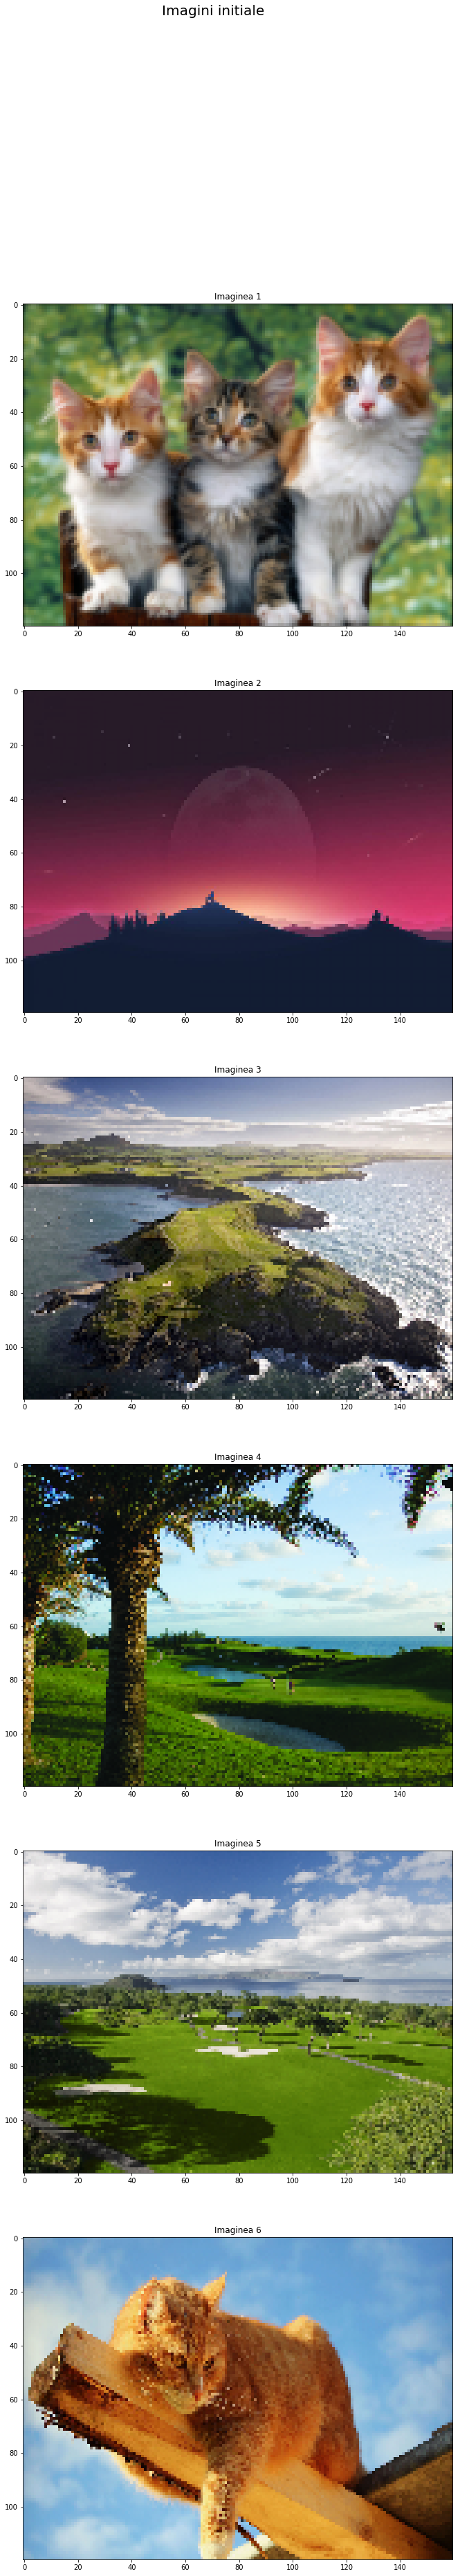

In [69]:
from skimage import io,color,util
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale, resize
import skimage as sk

size = (120, 160)
figs=(40,60)
fig=plt.figure(figsize=figs)
img1 = io.imread('img/pic1.jpg')
img1 = resize(img1, size,anti_aliasing=True)#,anti_aliasing=True)\\

img2 = io.imread('img/pic2.jpg')
img2 = resize(img2, size)

img3 = io.imread('img/pic3.jpg')
img3 = resize(img3, size)

img4 = io.imread('img/pic4.jpg')
img4 = resize(img4, size)

img5 = io.imread('img/pic5.jpg')
img5 = resize(img5, size)

img6 = io.imread('img/pic6.jpg')
img6 = resize(img6, size)


fig.suptitle('Imagini initiale', fontsize=20)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea 1')
ax2.title.set_text('Imaginea 2')
ax3.title.set_text('Imaginea 3')
ax4.title.set_text('Imaginea 4')
ax5.title.set_text('Imaginea 5')
ax6.title.set_text('Imaginea 6')
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)
ax5.imshow(img5)
ax6.imshow(img6)
plt.show()

### Functiile pentru zgomot Gaussian, respectiv zgomot impulsiv.

In [2]:
import os
import cv2
def gaussianNoise(image,sigma):
      row,col,ch= image.shape
      mean = 0 
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

def saltpepper(image,area):
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = area/2
      #half for salt and half for pepper
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out


### Adaugarea zgomotului pe imagini

In [3]:
Lista_imgZgomotGaussian=[]
Lista_imgZgomotImpulsiv=[]

img1ZG=gaussianNoise(img1,0.1)
img1ZI=saltpepper(img1,0.1)
Lista_imgZgomotGaussian.append(img1ZG)
Lista_imgZgomotImpulsiv.append(img1ZI)

img2ZG=gaussianNoise(img2,0.1)
img2ZI=saltpepper(img2,0.1)
Lista_imgZgomotGaussian.append(img2ZG)
Lista_imgZgomotImpulsiv.append(img2ZI)

img3ZG=gaussianNoise(img3,0.1)
img3ZI=saltpepper(img3,0.1)
Lista_imgZgomotGaussian.append(img3ZG)
Lista_imgZgomotImpulsiv.append(img3ZI)

img4ZG=gaussianNoise(img4,0.1)
img4ZI=saltpepper(img4,0.1)
Lista_imgZgomotGaussian.append(img4ZG)
Lista_imgZgomotImpulsiv.append(img4ZI)

img5ZG=gaussianNoise(img5,0.1)
img5ZI=saltpepper(img5,0.1)
Lista_imgZgomotGaussian.append(img5ZG)
Lista_imgZgomotImpulsiv.append(img5ZI)

img6ZG=gaussianNoise(img6,0.1)
img6ZI=saltpepper(img6,0.1)
Lista_imgZgomotGaussian.append(img6ZG)
Lista_imgZgomotImpulsiv.append(img6ZI)

C:\Users\Nitroi\AppData\Local\Continuum\anaconda3\envs\PAIC\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Nitroi\AppData\Local\Continuum\anaconda3\envs\PAIC\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


### Implementarea filtrelor clasice mediere si medie aritmetca

In [4]:
def medianFilter(img):
    L,l,_=img.shape    
    imag = img.astype(np.float64).copy()
    for i in range(1,L-1):
        for j in range(1,l-1):
            vR=np.sort(img[i-1:i+2,j-1:j+2,0],axis=None)
            vG=np.sort(img[i-1:i+2,j-1:j+2,1],axis=None)
            vB=np.sort(img[i-1:i+2,j-1:j+2,2],axis=None)
            mean=np.array([vR[4],vG[4],vB[4]])
            imag [i,j,0] = vR[4]
            imag [i,j,1] = vG[4]
            imag [i,j,2] = vB[4]
    return imag
def aritmeticFilter(img):
    L,l,_=img.shape
    imag = img.astype(np.float64).copy()
    for i in range(1,L-1):
        for j in range(1,l-1):
            imag [i,j,0] = np.sum(img[i-1:i+2,j-1:j+2,0])/9
            imag [i,j,1] = np.sum(img[i-1:i+2,j-1:j+2,1])/9
            imag [i,j,2] = np.sum(img[i-1:i+2,j-1:j+2,2])/9
    return imag

### Implementarea Neighborhood evaluated adaptive filter (NEAVF)

In [82]:
import math
import operator
def AVD(v):
    R=np.zeros(9)
    for i in range(0,9):
        for j in range(1,9):
            R[i]+=(v[i]-v[j])**2
        R[i]=math.sqrt(R[i])
    return R
def DALS(V,index):
    F=((1/4)*(V[4][1]-V[0][1])+5)/((1/index)*(V[index][1]-V[0][1])+1)
    return F
            
def NEAVF(img,h):
    L,l,_=img.shape
    imag = img.astype(np.float64).copy()
    FR=np.ones((L,l))
    FG=np.ones((L,l))
    FB=np.ones((L,l))
    for i in range(1,L-1):
        for j in range(1,l-1):
            vR=img[i-1:i+2,j-1:j+2,0].reshape(9)
            vG=img[i-1:i+2,j-1:j+2,1].reshape(9)
            vB=img[i-1:i+2,j-1:j+2,2].reshape(9)
            vR[0],vR[4] = vR[4],vR[0]
            vG[0],vG[4] = vG[4],vG[0]
            vB[0],vB[4] = vB[4],vB[0]            
            R=dict(zip(vR,AVD(vR)))
            G=dict(zip(vG,AVD(vG)))
            B=dict(zip(vB,AVD(vB)))
            cR,cG,cB=vR[0], vG[0], vB[0]            
            #sortare dupa AVD
            R = sorted(R.items(), key=operator.itemgetter(1))
            G = sorted(G.items(), key=operator.itemgetter(1))
            B = sorted(B.items(), key=operator.itemgetter(1))
            iR = [i for i, tupl in enumerate(R) if tupl[0] == cR][0]
            iG = [i for i, tupl in enumerate(G) if tupl[0] == cG][0]
            iB = [i for i, tupl in enumerate(B) if tupl[0] == cB][0]           
            #Lambda=7.5, delta=4.5
            if iR>=4:
                FR[i,j]=DALS(R,iR)
            else:
                FR[i,j]=1
            print(FR[i,j])    
            if iG>=4:
                FG[i,j]=DALS(G,iG)
            else:
                FG[i,j]=1
                
            if iB>=4:
                FB[i,j]=DALS(B,iB)
            else:
                FB[i,j]=1    
#     for i in range(1,L-1):
#         for j in range(1,l-1):
#             HR=np.sum(np.power(FR[i-1:i+2,j-1:j+2].reshape(9), 2))
#             HG=np.sum(np.power(FG[i-1:i+2,j-1:j+2].reshape(9), 2))
#             HB=np.sum(np.power(FR[i-1:i+2,j-1:j+2].reshape(9), 2))
#             print(HR)
    return imag

1.0
4.927737652120088
4.954487545012161
4.971734610008163
1.0
1.0
4.052693782441861
1.0
1.0
1.0
1.0
1.0
1.0
4.9651515568345355
4.986468511792219
1.0
4.960414433551338
4.5640482017514
4.96567902879568
4.966829592190872
4.957658060560786
4.971468103750676
1.0
1.0
1.0
1.0
4.903349352545388
4.87611483156044
4.875751479531421
1.0
1.0
4.843734090711539
4.716779248010135
1.0
4.199852218536769
1.0
1.0
1.0
4.964420398280378
4.962742182366262
3.945457182835228
1.0
4.978001324362256
4.93523551302869
1.0
1.0
4.964090366814492
3.985072578915317
1.0
4.9573173662994465
1.0
1.0
1.0
4.9799632467478805
1.0
4.987290695235247
1.0
1.0
4.840968708897879
4.8159072244139605
1.0
1.0
4.982565050986823
4.988784983977179
1.0
1.0
1.0
4.98432932320512
4.984201657529291
1.0
1.0
4.694460425581507
4.95914961939871
4.952781227673901
1.0
1.0
1.0
1.0
1.0
1.0
4.986568401750722
1.0
1.0
1.0
1.0
1.0
4.978653552657002
1.0
4.977285100444681
4.97523010728759
4.979472915989836
1.0
1.0
4.976644288867819
1.0
1.0
1.0
3.960475398950

1.0
1.0
4.772267543372724
4.261380526524322
1.0
4.993790363758158
1.0
1.0
4.402205815297161
1.0
4.462238840698362
1.0
4.9692593857749365
4.952522886084824
1.0
1.0
1.0
4.992447530303257
4.97350050608313
4.977483274120229
1.0
1.0
1.0
1.0
4.967288454119944
1.0
1.0
1.0
4.46205963549631
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.984598464712509
1.0
1.0
4.589226494566579
4.987674719237403
1.0
4.9854669666026545
4.977760338273348
1.0
1.0
3.928627406796636
4.945959995546996
4.829672241182808
1.0
1.0
1.0
4.985108884770776
1.0
1.0
1.0
1.0
4.9710320245346
1.0
1.0
1.0
1.0
4.988635704124065
1.0
4.676338549909299
1.0
1.0
1.0
1.0
4.990055454417573
1.0
4.757041090176986
1.0
4.990475082425579
4.972783049080249
1.0
1.0
1.0
1.0
1.0
1.0
4.963842320656357
3.96091504964982
4.983053820564065
1.0
4.9758746365438515
4.968301327504936
4.981717026153161
4.968148684249399
4.811428902443283
1.0
4.996880358123797
1.0
1.0
1.0
4.986040976405585
1.0
1.0
1.0
1.0
4.986375112270606
4.977983187315314
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

1.0
4.58339877232886
1.0
1.0
1.0
1.0
4.413912959588566
1.0
4.992711397346333
1.0
1.0
1.0
1.0
1.0
1.0
4.991539486590089
4.9925305392459824
1.0
4.912957169098591
4.9702253558845655
1.0
4.933445426034046
4.001373062411657
4.92894092114325
4.963949572367902
4.950900163295903
1.0
1.0
4.97783432754331
1.0
1.0
1.0
1.0
4.979923495360099
4.957717738138914
1.0
1.0
1.0
1.0
1.0
4.991213773072504
4.979960846836526
4.968931528195865
1.0
4.955454243703121
1.0
4.992086243107565
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.622636392787013
1.0
4.5456084074941625
1.0
1.0
4.984595501125878
4.956819229194687
4.98267274415349
1.0
4.97189895007099
1.0
1.0
4.944508215079376
1.0
1.0
4.277934304791759
1.0
1.0
1.0
4.984556685540867
1.0
4.9780317297760925
1.0
1.0
1.0
4.945938688873715
1.0
1.0
1.0
1.0
4.987761690175285
1.0
4.987728442172845
4.990228830201542
1.0
1.0
4.985173574327987
1.0
4.988697540292496
4.979896285278965
4.924922593382362
1.0
1.0
1.0
1.0
1.0
1.0
4.972120346909786
4.949845670554978
1.0
4.70975668029

4.977291626436875
4.963463821291306
3.9310693659948854
4.975412330054872
4.979016462928178
4.978513109351416
4.982496994031877
4.984818406373859
1.0
4.975644681708298
4.961119087596941
1.0
1.0
1.0
4.975152547410095
1.0
1.0
4.205676931252854
4.248693977582282
1.0
1.0
1.0
1.0
4.910650542158596
4.932285540333658
4.928849518009729
4.958028639475253
1.0
4.918593662073044
1.0
1.0
4.946262837120555
4.94172902759061
1.0
4.936982237780698
1.0
4.872344490702717
4.73991088652391
4.84362477206412
1.0
1.0
1.0
1.0
4.224076082328361
1.0
1.0
4.038244580860714
1.0
1.0
1.0
1.0
1.0
1.0
4.454080867263193
4.926303664902189
1.0
1.0
4.965162093407067
1.0
1.0
4.966516096224642
4.953640918830597
4.965285135351844
1.0
4.346406325892385
4.964668470308981
1.0
1.0
1.0
4.958583693039539
1.0
4.953305309418779
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.967336908388845
4.561188332621516
4.970488548647222
1.0
4.10902269666605
1.0
1.0
4.990354563785698
1.0
4.98046605334535
4.929780890830027
4.435228962304782
1.0
4.9456123118100255
4

4.97211748311189
4.98566362577327
1.0
4.083564244373689
4.496946336733342
1.0
1.0
4.919955427363775
1.0
1.0
1.0
4.974021247996969
1.0
4.935994809054491
4.8948315398505615
1.0
1.0
1.0
1.0
1.0
1.0
4.972536080102556
4.933625531013658
4.927738313650036
1.0
4.487129468335819
4.939003921254242
4.927527597246491
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.763813238467091
1.0
1.0
1.0
1.0
4.971246482519841
1.0
1.0
4.985921453082414
1.0
4.966557802402163
1.0
4.915242601036359
1.0
1.0
1.0
1.0
4.977939469431511
4.941266169604643
1.0
1.0
1.0
4.957532896677906
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.949726327447499
4.973799468010166
1.0
1.0
4.9222268599592685
1.0
1.0
4.922528994257777
4.912306045244259
4.941819215393904
1.0
4.962000308885159
1.0
1.0
4.546899663931636
4.314746959356775
1.0
4.943453324036288
1.0
4.287503005146197
1.0
1.0
4.977188094566066
4.966921992252224
4.948342431730217
4.922200679124316
4.925985392306085
4.963960292750916
1.0
1.0
4.97966709094255
4.969479206035391
4.979811578529159
4.978

1.0
1.0
4.9733344380113715
4.95821387634249
4.150631198144913
1.0
1.0
1.0
4.953574544858985
1.0
1.0
1.0
1.0
1.0
1.0
4.957025171146979
4.958363207648333
1.0
4.977516180044578
4.973454820676451
4.976562043367582
4.962192813667944
4.9581899890391545
4.906406075697224
1.0
1.0
4.970914649637195
4.980633471242215
1.0
4.503047996147584
4.878879228678132
1.0
1.0
1.0
4.811904193561586
1.0
1.0
4.3701853605201775
1.0
1.0
1.0
1.0
1.0
4.929439699878196
1.0
1.0
4.916418916751203
1.0
4.88413990126938
4.855335137555656
4.143218252028171
4.930418333452603
1.0
1.0
1.0
1.0
4.315635567490021
4.948457043009728
4.975000421893533
1.0
1.0
4.927776339318876
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.965273067535441
1.0
1.0
1.0
1.0
1.0
1.0
4.947772669357387
4.934033457644783
1.0
1.0
4.957049688791213
4.981412549789407
1.0
4.925041355789576
4.010326896113843
1.0
4.906518837394802
4.95295877457474
1.0
1.0
1.0
4.981649848442022
4.981641698357217
4.949186830818943
3.987294275032579
4.936505055673227
1.0
1.0
1.0


1.0
1.0
1.0
1.0
4.975809406362178
1.0
1.0
4.947288583780322
1.0
4.974979476246476
4.961958924719777
1.0
1.0
4.94837267808386
4.9454238105313895
4.957441947270291
1.0
1.0
4.9747886853789804
4.978008360735309
4.9479928311410335
4.959411632610729
1.0
1.0
4.982967577643094
1.0
1.0
1.0
4.964630584650185
4.9736753871071295
4.957670764800348
1.0
4.948293702496417
4.929769285255492
1.0
1.0
1.0
4.971413587338046
4.931086327366231
1.0
1.0
4.979350809428523
1.0
1.0
1.0
1.0
1.0
1.0
4.981632802481643
4.993672366245198
1.0
4.950944461019526
4.942991933663772
4.962557080656665
4.956204487670966
4.964459448788255
4.966019628493451
4.99132430611842
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.643359638123551
4.983331352900979
4.945419549614428
4.9486139805207285
4.968164339639002
1.0
4.978595968489246
1.0
1.0
4.954006907705095
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.975594859619422
1.0
1.0
4.976641899266178
4.97197001595481
4.984402512903967
4.987241794764945
4.018170330032402
1.0
4.954993440832359
1.0
4.9588159529

4.941101085185257
4.9378700386657775
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.97194950366706
1.0
1.0
1.0
1.0
3.712827768986279
4.987091363779253
1.0
1.0
4.0713557619289835
4.979932262508205
1.0
4.985376177883272
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.983500336612838
4.990323527533621
4.984885224764807
4.986016741025073
1.0
4.15332060068947
4.995142564287859
4.973311077120442
4.977756501081714
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.955076908165473
4.908705026874163
4.951850674372236
4.957095613149124
1.0
1.0
4.0329481084672265
4.962201559897314
1.0
4.969667327759061
1.0
1.0
4.984975748239037
4.979224320199604
4.972614838073015
1.0
1.0
1.0
1.0
4.375650721824148
1.0
4.879422242659754
1.0
4.732971595887732
1.0
1.0
1.0
4.910098713641314
4.948362816304349
4.925566718315798
1.0
1.0
4.8749501253345
4.811229452002148
4.943537621630762
4.943348308086706
1.0
1.0
1.0
1.0
4.981819993553468
1.0
1.0
1.0
1.0
4.952287652145347
4.971802062880834
1.0
4.994490454128266
1.0
4.926954966933951
4.888709879554458
4.90512085390

4.9485574525997365
1.0
4.97585411856725
1.0
1.0
4.981952176277483
4.924841038062113
1.0
1.0
4.93866512597715
1.0
1.0
4.9169520160870865
1.0
1.0
4.948754436497253
4.965270930110429
1.0
1.0
4.96814653486083
4.2444286918302225
1.0
4.987952598890737
4.991826831476263
1.0
1.0
1.0
4.954863197861892
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.9278942477526
1.0
1.0
1.0
1.0
1.0
4.979191114931037
4.982823165526813
4.974339953096328
3.7790947534434554
4.984616265135803
4.9934988755406735
1.0
4.992917293404624
1.0
1.0
1.0
1.0
4.981948116012402
3.858419573074456
4.967723546548812
1.0
3.897204950773861
1.0
1.0
4.169519346332356
4.982439715171429
4.986290134330985
4.9891800873064645
1.0
1.0
1.0
4.972864818133875
4.988471630011905
4.982830387698756
4.540391348735399
4.990804234815802
4.965006561218832
4.96345037497363
1.0
1.0
1.0
1.0
1.0
1.0
4.957670484939111
4.960805516260025
1.0
1.0
1.0
4.952909524429691
1.0
1.0
1.0
1.0
1.0
4.977503212808513
4.934493994800823
4.266921176050614
1.0
4.921973178491041
4.419434374562

4.995567388154267
1.0
4.992234373062963
4.984070266878318
4.965411112440693
1.0
1.0
4.9946112605025625
1.0
1.0
1.0
4.988046084092405
3.9241392577125898
4.984203570293777
4.993121333810343
4.9911726559133625
1.0
1.0
4.971580115991538
4.616629929356296
1.0
4.957589475248774
4.966248324946602
1.0
4.946005689505285
4.930603760428406
4.963791693691303
1.0
4.993656875731699
4.9697614837294095
4.467671452651532
4.942142026504531
1.0
1.0
1.0
4.966126838936985
1.0
4.9354802758622505
4.933407538087583
4.97414130962178
4.964330543709821
1.0
4.980852474683089
4.9539446031613785
4.948136600949544
4.966989197417583
1.0
1.0
1.0
1.0
1.0
1.0
4.985752199664543
4.99464109346909
1.0
1.0
1.0
1.0
1.0
4.97983783415115
1.0
4.107756725864219
1.0
4.954018345955028
4.924813645248517
1.0
4.26427531535518
1.0
4.409630687582183
4.903523789514123
4.32363700587996
4.933232898566627
4.984314906908926
1.0
1.0
4.980940862321326
1.0
4.479595135937467
1.0
1.0
1.0
4.975099417532328
1.0
1.0
4.976495357679233
1.0
1.0
1.0
1.0

1.0
1.0
4.980341447686529
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.957981614240525
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.969958152375515
4.967769959935844
4.971112193760208
1.0
4.976063014181929
4.961104868586479
4.964546981650092
4.957954995644638
1.0
4.979768054298164
1.0
1.0
1.0
1.0
4.8919029882270975
1.0
4.971463569585359
4.923920263583284
4.958721986519299
1.0
1.0
1.0
1.0
4.442385083375739
4.987632616076916
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.6316184994673515
4.9851193942511465
1.0
1.0
1.0
3.8965635668147693
1.0
1.0
1.0
1.0
1.0
1.0
4.611690837252852
4.936995046115839
1.0
4.9569836216526815
4.966350273087616
4.664916577386614
4.93959053018383
1.0
1.0
1.0
1.0
1.0
1.0
4.954639947745978
4.968457470528044
1.0
4.970596565482231
4.947627933185096
1.0
1.0
4.7344778425576655
1.0
1.0
1.0
1.0
4.972534187765126
4.674007407534294
1.0
1.0
1.0
1.0
1.0
4.96465075726646
1.0
1.0
4.97053035036758
1.0
1.0
1.0
4.960582294598725
1.0
1.0
1.0
4.978651152728115
1.0
1.0
4.972905170115159
1.0
1.0
4.53461

1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.943358873089885
1.0
1.0
1.0
4.93052436451212
1.0
1.0
1.0
1.0
1.0
4.901299871321342
1.0
1.0
1.0
1.0
4.989671451563343
4.984945902713804
4.990315447029836
4.988231505819164
1.0
4.987659783353852
1.0
1.0
1.0
4.663395722785661
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.5289639204371355
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.952045131016174
4.960244496128998
1.0
4.993656050752958
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.882997455721059
4.553743218240617
1.0
4.9482863041018055
4.913565022267304
1.0
1.0
4.984573715308562
1.0
1.0
1.0
4.431857683245268
4.960163211006817
4.96460161402376
1.0
4.967988181272146
4.974198868921284
4.965053298794031
1.0
4.959848849228723
4.725287934887873
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.276092826210026
4.973346772607419
4.970931564858145
1.0
4.979292635803676
1.0
4.981487619475672
3.9283601408530937
4.9774958993021885
1.0
1.0
4.97247233041874
4.988566098731056
1.0
1.0
1.0
1.0
4.464783090427385
1.0
4.978087389088406
4.955675411123066

4.978637838168967
1.0
1.0
1.0
1.0
4.979117367444445
1.0
4.9636623422691875
1.0
1.0
1.0
1.0
1.0
1.0
4.229971648548672
1.0
4.951758911501299
1.0
4.962887962033623
1.0
4.290136417609891
1.0
4.3049021148820295
4.971055498229769
4.992781327597443
4.979905697351781
1.0
1.0
1.0
4.949581816644151
1.0
1.0
1.0
1.0
4.5167355833852065
4.380953967545666
4.96097034618659
1.0
1.0
4.967801636810782
1.0
1.0
4.31815304640805
1.0
1.0
4.923988070882466
4.9194611223208
4.92077057178038
1.0
1.0
1.0
1.0
4.914621216418808
1.0
4.901799189573441
1.0
4.9202457762007805
4.869981121152736
1.0
1.0
1.0
4.9876400799262885
4.970117767889656
1.0
4.776627972034465
4.973141330788211
1.0
1.0
4.988570293128306
4.982448750329889
1.0
4.98396734852595
4.00462975032873
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.994804939160274
1.0
4.946455962196292
4.917462697192427
4.925335511950103
4.973284344193673
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.975286053018108
1.0
4.973030818061096
1.0
1.0
1.0
4.198585793368244
1.0
4.933697286479082
4.3928236895

1.0
1.0
1.0
1.0
1.0
4.982268875936051
4.960538885054862
1.0
4.924200539366073
1.0
1.0
4.9724691466847375
1.0
4.952801858459736
1.0
1.0
4.834451852734641
4.88040859691763
1.0
4.942917603203137
4.9315507099321145
1.0
1.0
1.0
4.932720745504522
4.0061851662294705
4.958146225008912
4.9665881170011295
3.917416665478024
4.9700844647203875
4.984532298480005
4.736543790545185
4.973488952541839
4.947244482170254
1.0
1.0
4.9764048448072025
1.0
4.986869638640991
4.970825783474173
4.376544211268303
1.0
4.981020100354667
4.991857875642325
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.96262582174701
1.0
1.0
1.0
4.971807981476697
1.0
4.978048639945542
1.0
1.0
4.948072286171626
4.219164100084209
1.0
4.971320797824859
1.0
1.0
4.951140970093153
4.948868685594405
1.0
1.0
1.0
4.978963985923327
1.0
4.944699102966238
4.958853513370086
4.197429183090841
1.0
1.0
1.0
1.0
1.0
4.987681057099986
1.0
1.0
1.0
1.0
4.970020747985794
4.961335049257797
1.0
1.0
1.0
1.0
1.0
4.974626345379198
1.0
1.0
4.939788552755279
1.0
1.0
4.4797377699

1.0
1.0
1.0
1.0
1.0
4.987489836679023
1.0
1.0
4.98353241034541
4.982614815279439
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.200563645925233
1.0
4.93636125016027
4.938401416526569
4.951298728750747
1.0
1.0
1.0
4.983510774097404
4.359483908412246
1.0
4.903979852066702
1.0
1.0
4.941530682363948
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.976936691956589
4.271383506810923
1.0
4.213743292627247
1.0
4.978127175591996
4.288163252236437
4.975325325296221
4.971188531289855
4.970004057856612
4.9780552597683805
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.958226785925003
1.0
1.0
1.0
4.008539173189614
4.964424178491539
1.0
1.0
4.012757380741681
1.0
1.0
4.958113629916412
4.942246598804236
1.0
1.0
1.0
4.892058143192319
1.0
1.0
1.0
1.0
1.0
4.948826044902284
1.0
1.0
1.0
4.972007135127273
4.963285860464893
1.0
4.962604217795798
4.941586788334205
4.948107399201111
1.0
1.0
1.0
1.0
4.962302904367693
1.0
4.979095343475532
4.9809828523564965
1.0
4.9842109843613125
4.373827770275112
4.936784775578893
1.0
4.208699036106809
4.9673327316072
4.98520

4.926539071954114
4.944481594999701
4.952803024765961
4.89480494478415
4.890943460289157
4.9432565920857225
4.4432616519829295
4.97584753594066
4.952772440749321
4.22201503292379
1.0
1.0
4.962937755271603
1.0
1.0
4.97218055498249
4.959700479224067
4.974485538034389
1.0
1.0
1.0
1.0
4.9202915164119325
1.0
4.948356065363128
4.920586510433973
1.0
4.969804699069901
1.0
1.0
4.086866317653477
4.897958192325603
1.0
4.920885210141967
4.200728903792271
1.0
4.935933524002744
4.945901441189064
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.991075468986177
1.0
1.0
1.0
4.773579246859844
1.0
1.0
4.949201541924428
1.0
1.0
1.0
1.0
4.9877520119437255
4.981368662829718
1.0
1.0
1.0
1.0
1.0
4.913506900609686
1.0
1.0
4.473590247688934
1.0
4.965030918041803
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.96394577630158
1.0
1.0
4.9229802251470005
4.9703079645615444
1.0
1.0
1.0
1.0
1.0
1.0
4.955437439355907
4.925436086212244
1.0
1.0
4.988387755087089
1.0
1.0
4.74770068588525
1.0
4.79458269963313
1.0
1.0
1.0
1.0
1.0
1.0
4

1.0
4.146115587254631
4.1046486971323715
4.793256118816615
1.0
4.882533151448198
1.0
4.935286929383827
4.901040980967552
4.9345821673042245
4.925065292223249
4.832953199406299
1.0
4.23959695261684
1.0
1.0
1.0
4.924586610378017
4.909408010266273
1.0
4.963138844934789
1.0
1.0
1.0
4.965085327478004
1.0
4.994865365698988
1.0
1.0
1.0
1.0
4.624154190515782
1.0
4.515255638711168
1.0
1.0
1.0
1.0
1.0
1.0
4.649343338047724
3.9936624949679618
1.0
4.974018307472595
1.0
4.960733163946934
1.0
1.0
1.0
4.996378513240892
1.0
4.991193347431494
1.0
1.0
4.465447340228521
4.790517161669469
1.0
4.967190515065158
4.969155588879486
1.0
4.9323765051024315
1.0
1.0
1.0
1.0
1.0
4.022017596106262
1.0
1.0
4.838943947681027
4.004802187361696
1.0
4.957994022690228
4.954613358251156
1.0
1.0
1.0
4.984051294095303
4.985159645180873
1.0
1.0
4.94579648514997
4.947877503044255
1.0
1.0
1.0
1.0
1.0
4.890593581633827
4.879724824667546
1.0
1.0
1.0
4.889008380368103
1.0
4.931743104514108
1.0
1.0
1.0
4.634134593615002
1.0
1.0
1.

4.152465061133445
4.9730632400497194
1.0
1.0
4.968091610970761
4.985856036655557
1.0
1.0
1.0
1.0
4.96937716884954
4.951488330630304
4.959015195037265
4.94654885143569
4.9538189458617365
4.941298398649343
4.935689047407503
4.947027871436502
4.940857797664503
4.952518758795522
4.971013750299594
1.0
4.968249175812728
4.962433002611278
1.0
4.967446859399454
1.0
4.977216472763619
4.485266318758663
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.896112163079258
1.0
4.931674942399373
1.0
1.0
1.0
1.0
1.0
1.0
4.933771125200392
1.0
4.807456368625568
4.957444557073098
1.0
1.0
4.953026478241439
1.0
4.979874655517645
4.944519224683815
4.991818979054141
1.0
1.0
1.0
4.948171373212189
1.0
4.984026429182734
4.919474586360089
4.255992845294246
1.0
1.0
1.0
1.0
1.0
1.0
4.869199702448652
1.0
1.0
1.0
1.0
1.0
1.0
4.614485648062184
1.0
1.0
1.0
4.382398204212774
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.094462220308688
4.704986139418725
4.897684276204684
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4.559910499328

(<Figure size 720x720 with 1 Axes>, <matplotlib.image.AxesImage at 0xdeb7898>)

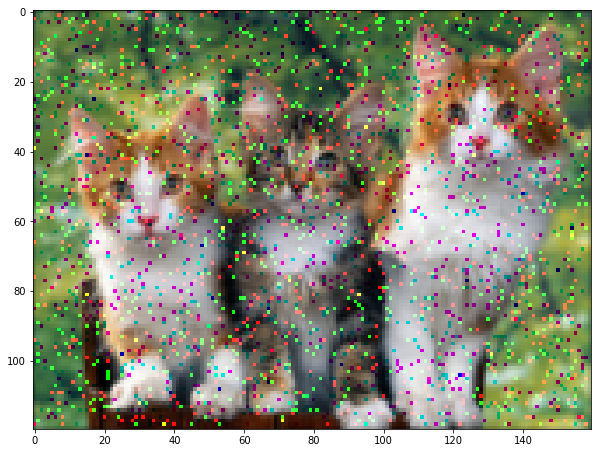

In [83]:
#TEST
plt.figure(figsize=(10,10)), plt.imshow(NEAVF(img1ZI,0.4))

## Comparatia rezultatlor celor 3 filtre
### Imaginea 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


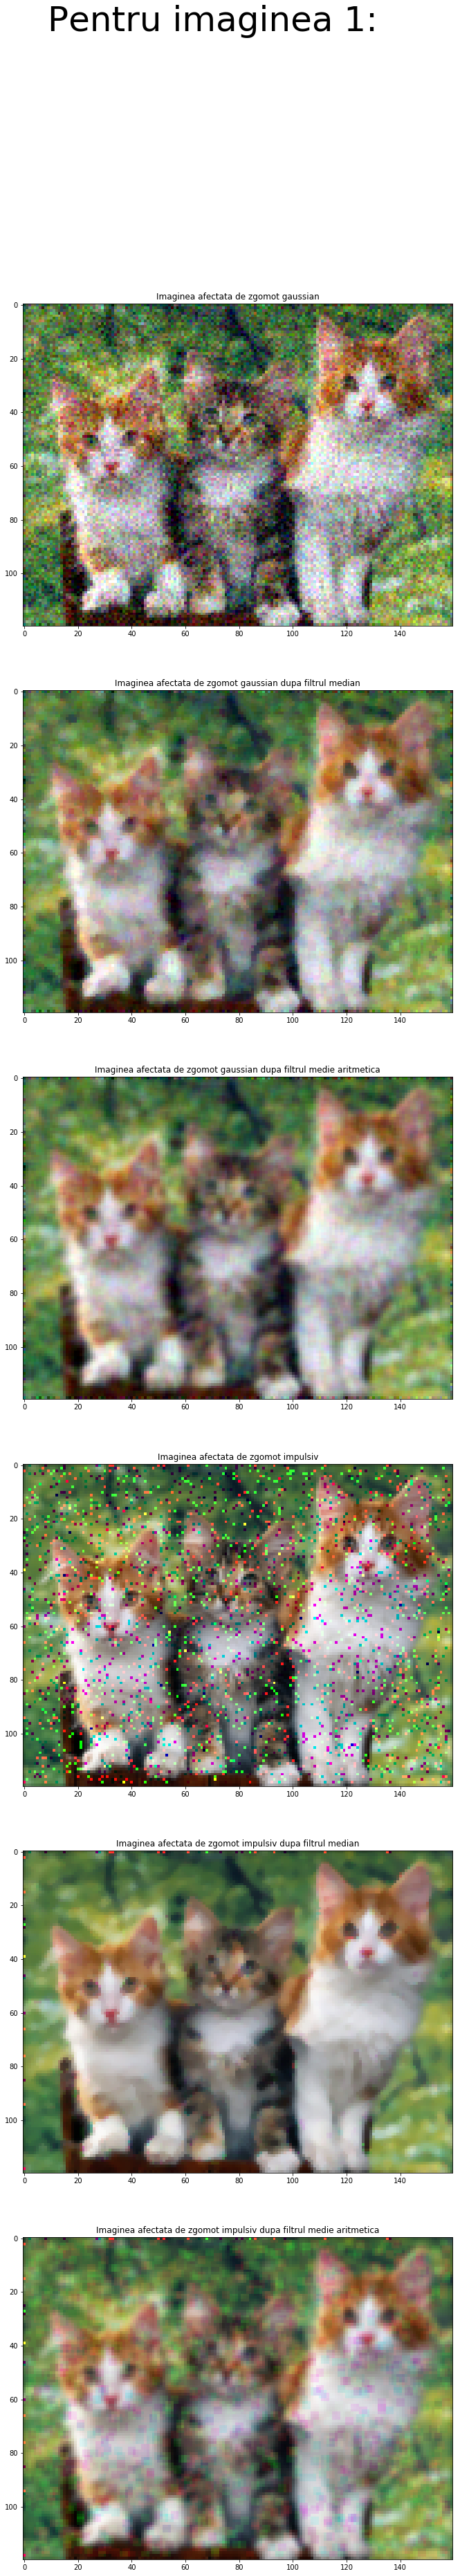

In [7]:
index=0
fig=plt.figure(figsize=figs)
imgZG_afterMedian=medianFilter(Lista_imgZgomotGaussian[index])
imgZG_afterAritmetic=aritmeticFilter(Lista_imgZgomotGaussian[index])


imgZI_afterMedian=medianFilter(Lista_imgZgomotImpulsiv[index])
imgZI_afterAritmetic=aritmeticFilter(Lista_imgZgomotImpulsiv[index])



fig.suptitle('Pentru imaginea 1:', fontsize=50)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea afectata de zgomot gaussian')
ax2.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul median')
ax3.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul medie aritmetica')
ax4.title.set_text('Imaginea afectata de zgomot impulsiv')
ax5.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul median')
ax6.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul medie aritmetica')
ax1.imshow(Lista_imgZgomotGaussian[index])
ax2.imshow(imgZG_afterMedian)
ax3.imshow(imgZG_afterAritmetic)
ax4.imshow(Lista_imgZgomotImpulsiv[index])
ax5.imshow(imgZI_afterMedian)
ax6.imshow(imgZI_afterAritmetic)
plt.show()

### Imaginea 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


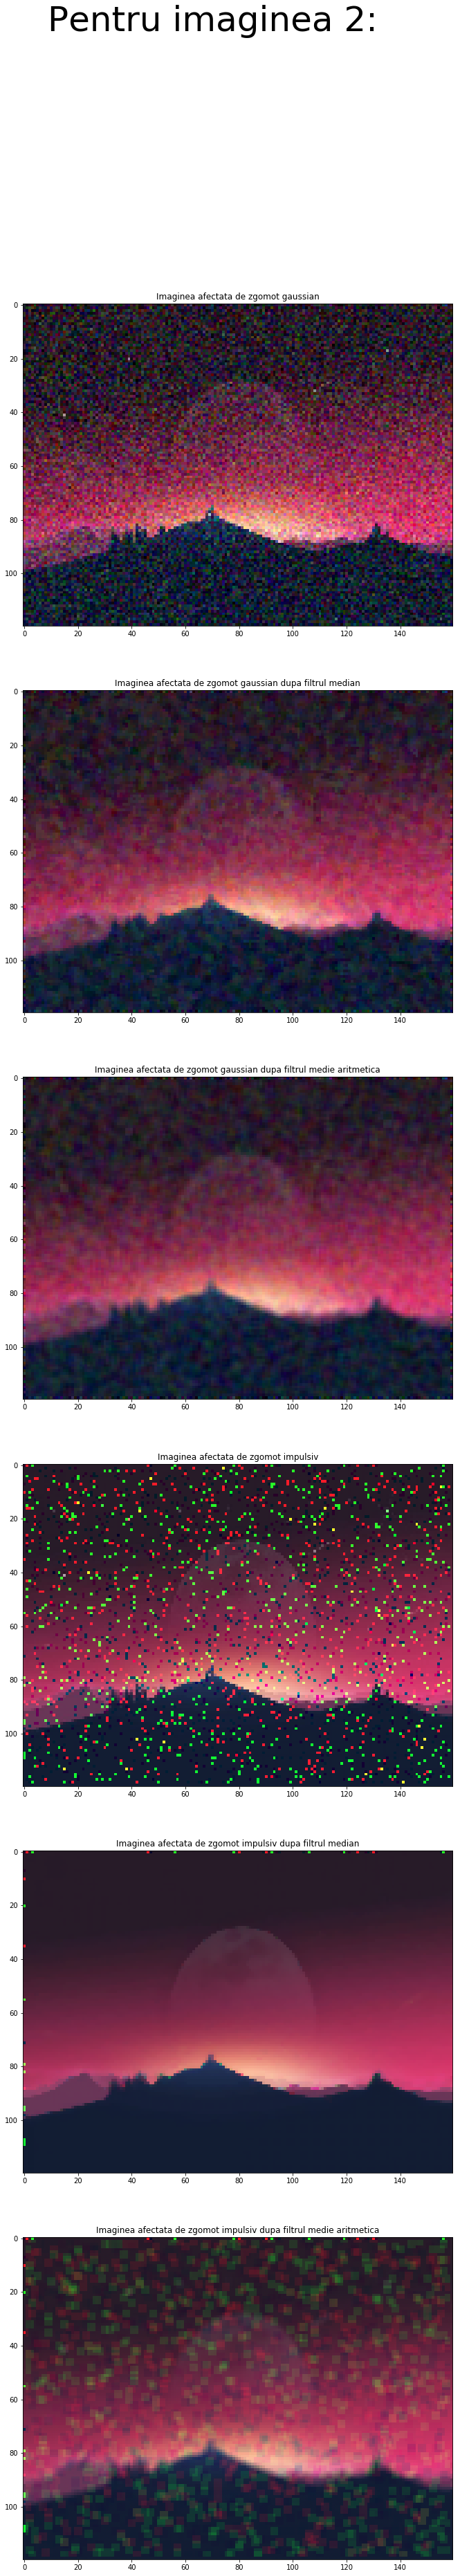

In [8]:
index=1
fig=plt.figure(figsize=figs)
imgZG_afterMedian=medianFilter(Lista_imgZgomotGaussian[index])
imgZG_afterAritmetic=aritmeticFilter(Lista_imgZgomotGaussian[index])


imgZI_afterMedian=medianFilter(Lista_imgZgomotImpulsiv[index])
imgZI_afterAritmetic=aritmeticFilter(Lista_imgZgomotImpulsiv[index])



fig.suptitle('Pentru imaginea 2:', fontsize=50)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea afectata de zgomot gaussian')
ax2.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul median')
ax3.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul medie aritmetica')
ax4.title.set_text('Imaginea afectata de zgomot impulsiv')
ax5.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul median')
ax6.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul medie aritmetica')
ax1.imshow(Lista_imgZgomotGaussian[index])
ax2.imshow(imgZG_afterMedian)
ax3.imshow(imgZG_afterAritmetic)
ax4.imshow(Lista_imgZgomotImpulsiv[index])
ax5.imshow(imgZI_afterMedian)
ax6.imshow(imgZI_afterAritmetic)
plt.show()

### Imaginea 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


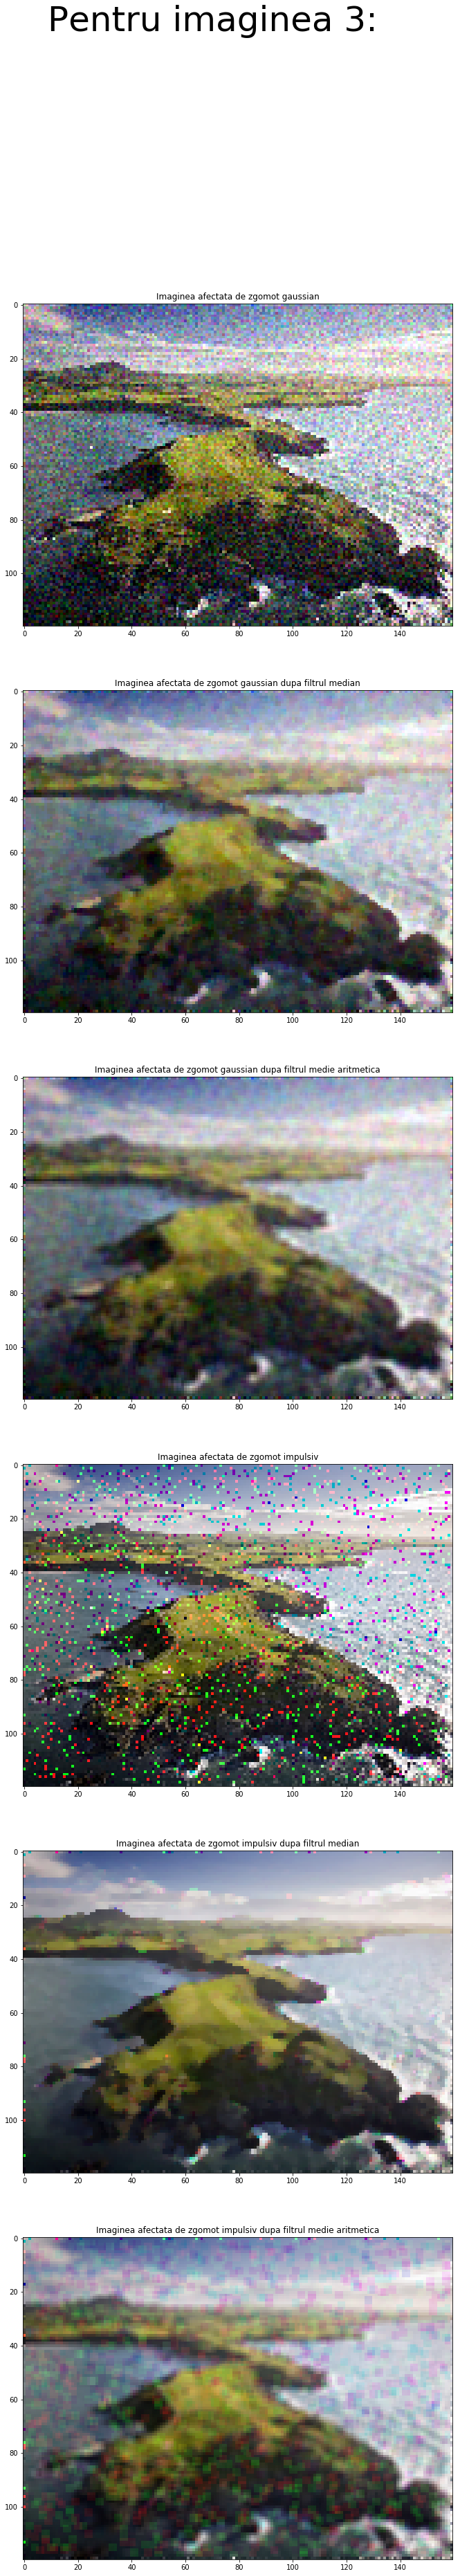

In [9]:
index=2
fig=plt.figure(figsize=figs)
imgZG_afterMedian=medianFilter(Lista_imgZgomotGaussian[index])
imgZG_afterAritmetic=aritmeticFilter(Lista_imgZgomotGaussian[index])


imgZI_afterMedian=medianFilter(Lista_imgZgomotImpulsiv[index])
imgZI_afterAritmetic=aritmeticFilter(Lista_imgZgomotImpulsiv[index])



fig.suptitle('Pentru imaginea 3:', fontsize=50)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea afectata de zgomot gaussian')
ax2.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul median')
ax3.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul medie aritmetica')
ax4.title.set_text('Imaginea afectata de zgomot impulsiv')
ax5.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul median')
ax6.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul medie aritmetica')
ax1.imshow(Lista_imgZgomotGaussian[index])
ax2.imshow(imgZG_afterMedian)
ax3.imshow(imgZG_afterAritmetic)
ax4.imshow(Lista_imgZgomotImpulsiv[index])
ax5.imshow(imgZI_afterMedian)
ax6.imshow(imgZI_afterAritmetic)
plt.show()

### Imaginea 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


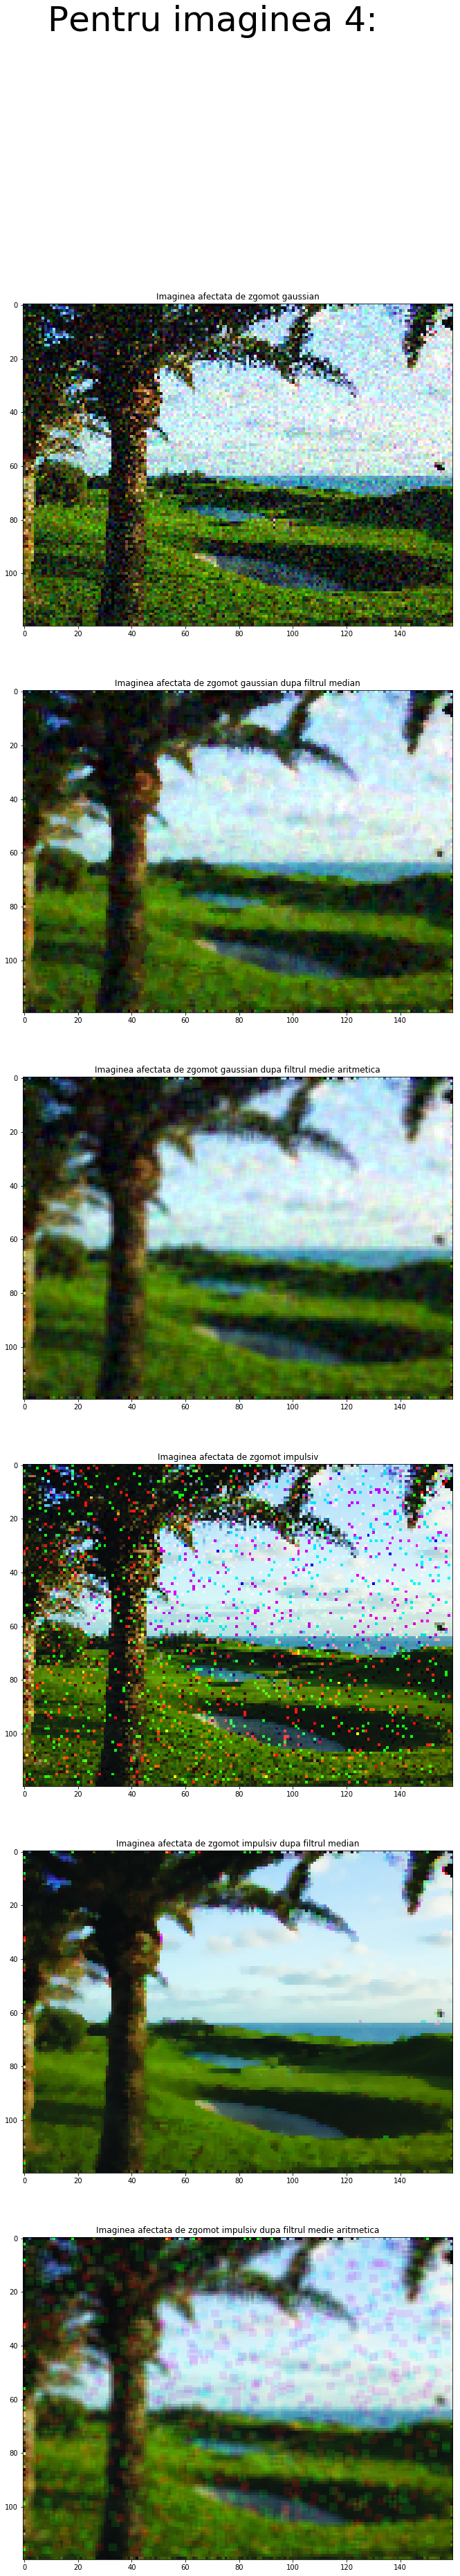

In [10]:
index=3
fig=plt.figure(figsize=figs)
imgZG_afterMedian=medianFilter(Lista_imgZgomotGaussian[index])
imgZG_afterAritmetic=aritmeticFilter(Lista_imgZgomotGaussian[index])


imgZI_afterMedian=medianFilter(Lista_imgZgomotImpulsiv[index])
imgZI_afterAritmetic=aritmeticFilter(Lista_imgZgomotImpulsiv[index])



fig.suptitle('Pentru imaginea 4:', fontsize=50)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea afectata de zgomot gaussian')
ax2.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul median')
ax3.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul medie aritmetica')
ax4.title.set_text('Imaginea afectata de zgomot impulsiv')
ax5.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul median')
ax6.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul medie aritmetica')
ax1.imshow(Lista_imgZgomotGaussian[index])
ax2.imshow(imgZG_afterMedian)
ax3.imshow(imgZG_afterAritmetic)
ax4.imshow(Lista_imgZgomotImpulsiv[index])
ax5.imshow(imgZI_afterMedian)
ax6.imshow(imgZI_afterAritmetic)
plt.show()

### Imaginea 5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


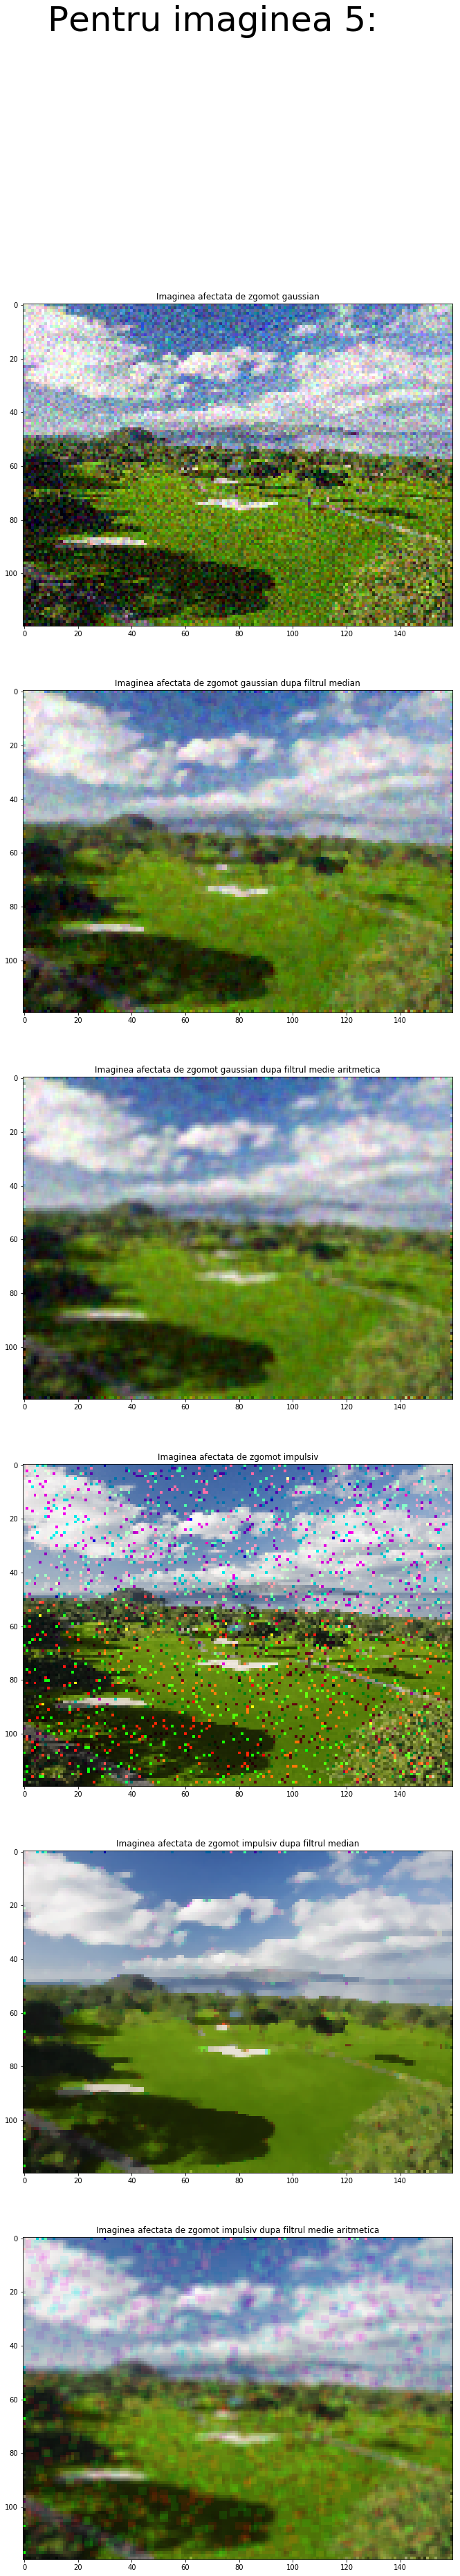

In [11]:
index=4
fig=plt.figure(figsize=figs)
imgZG_afterMedian=medianFilter(Lista_imgZgomotGaussian[index])
imgZG_afterAritmetic=aritmeticFilter(Lista_imgZgomotGaussian[index])


imgZI_afterMedian=medianFilter(Lista_imgZgomotImpulsiv[index])
imgZI_afterAritmetic=aritmeticFilter(Lista_imgZgomotImpulsiv[index])



fig.suptitle('Pentru imaginea 5:', fontsize=50)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea afectata de zgomot gaussian')
ax2.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul median')
ax3.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul medie aritmetica')
ax4.title.set_text('Imaginea afectata de zgomot impulsiv')
ax5.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul median')
ax6.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul medie aritmetica')
ax1.imshow(Lista_imgZgomotGaussian[index])
ax2.imshow(imgZG_afterMedian)
ax3.imshow(imgZG_afterAritmetic)
ax4.imshow(Lista_imgZgomotImpulsiv[index])
ax5.imshow(imgZI_afterMedian)
ax6.imshow(imgZI_afterAritmetic)
plt.show()

### Imaginea 6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


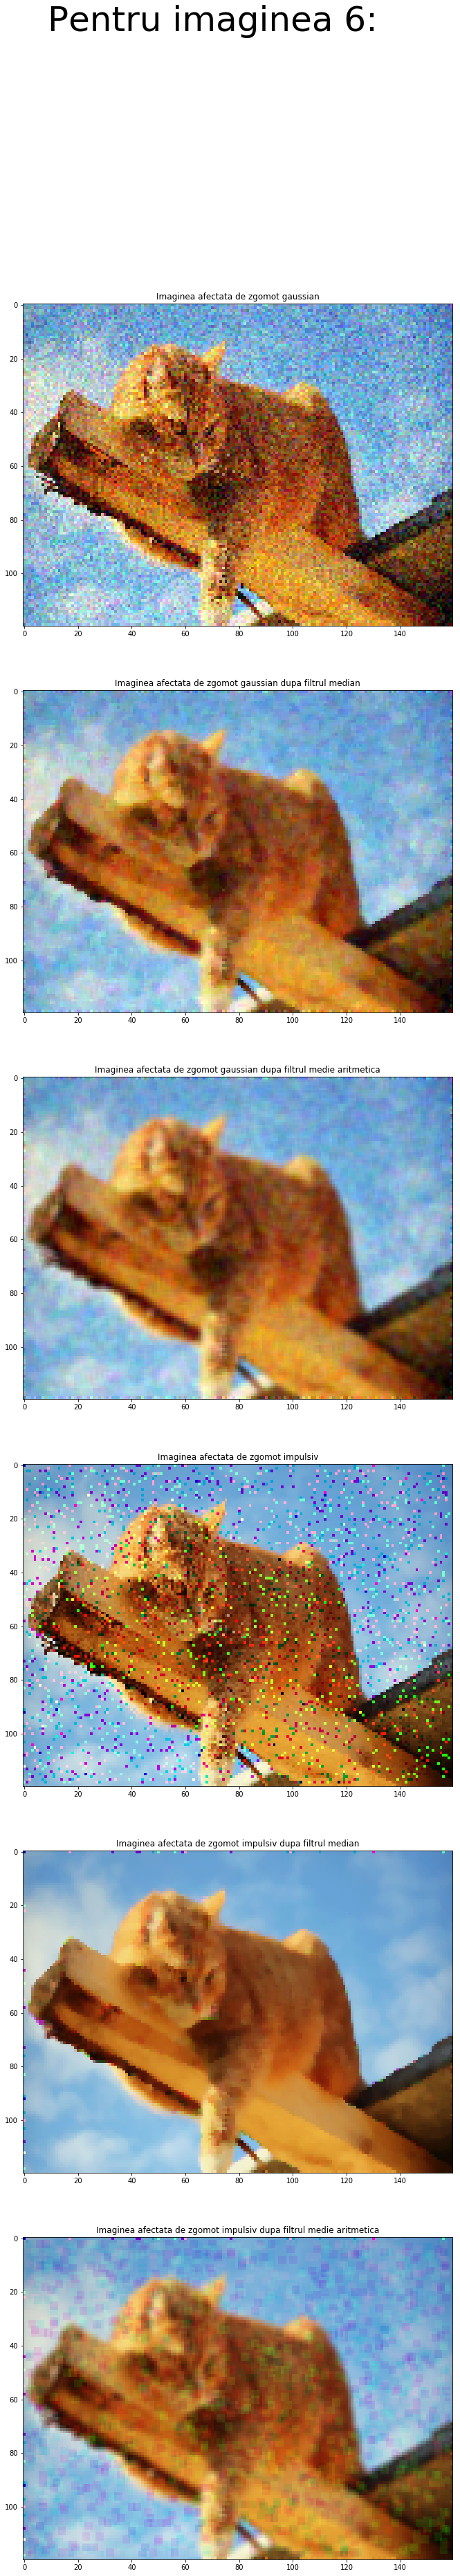

In [12]:
index=5
fig=plt.figure(figsize=figs)
imgZG_afterMedian=medianFilter(Lista_imgZgomotGaussian[index])
imgZG_afterAritmetic=aritmeticFilter(Lista_imgZgomotGaussian[index])


imgZI_afterMedian=medianFilter(Lista_imgZgomotImpulsiv[index])
imgZI_afterAritmetic=aritmeticFilter(Lista_imgZgomotImpulsiv[index])



fig.suptitle('Pentru imaginea 6:', fontsize=50)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
ax1.title.set_text('Imaginea afectata de zgomot gaussian')
ax2.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul median')
ax3.title.set_text('Imaginea afectata de zgomot gaussian dupa filtrul medie aritmetica')
ax4.title.set_text('Imaginea afectata de zgomot impulsiv')
ax5.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul median')
ax6.title.set_text('Imaginea afectata de zgomot impulsiv dupa filtrul medie aritmetica')
ax1.imshow(Lista_imgZgomotGaussian[index])
ax2.imshow(imgZG_afterMedian)
ax3.imshow(imgZG_afterAritmetic)
ax4.imshow(Lista_imgZgomotImpulsiv[index])
ax5.imshow(imgZI_afterMedian)
ax6.imshow(imgZI_afterAritmetic)
plt.show()